# Association Rules:

In [30]:
# Load the dataset

import pandas as pd

file_path = r"C:\Users\SHREYAS\Desktop\Online retail.xlsx"
xls = pd.ExcelFile(file_path)

xls.sheet_names

['Sheet1']

In [3]:
df = pd.read_excel(xls, sheet_name="Sheet1")

In [4]:
df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [5]:
df.shape

(7500, 1)

In [28]:
# Split the single-column transaction data into a list format

transactions = df.iloc[:, 0].dropna().apply(lambda x: x.split(','))

In [29]:
#  Convert transactions into a list

transactions_list = transactions.tolist()

In [11]:
transactions_list[:5]

[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt']]

In [13]:
!pip install mlxtend

In [12]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [15]:
# one-hot encoding format

te = TransactionEncoder()
te_ary = te.fit(transactions_list).transform(transactions_list)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [16]:
# Apply Apriori algorithm 

frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

In [17]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

In [18]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(avocado),(mineral water),0.033200,0.238267,0.011467,0.345382,1.449559,1.0,0.003556,1.163629,0.320785,0.044103,0.140620,0.196753
1,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,1.0,0.013127,1.224782,0.499351,0.120941,0.183528,0.245256
2,(burgers),(french fries),0.087200,0.170933,0.022000,0.252294,1.475976,1.0,0.007095,1.108813,0.353289,0.093168,0.098135,0.190499
3,(burgers),(green tea),0.087200,0.132000,0.017467,0.200306,1.517468,1.0,0.005956,1.085415,0.373584,0.086583,0.078693,0.166315
4,(burgers),(milk),0.087200,0.129600,0.017867,0.204893,1.580964,1.0,0.006566,1.094695,0.402580,0.089812,0.086504,0.171377
5,(burgers),(mineral water),0.087200,0.238267,0.024400,0.279817,1.174384,1.0,0.003623,1.057693,0.162675,0.081045,0.054546,0.191111
6,(burgers),(spaghetti),0.087200,0.174133,0.021467,0.246177,1.413729,1.0,0.006282,1.095572,0.320608,0.089494,0.087234,0.184727
7,(cake),(eggs),0.081067,0.179733,0.019067,0.235197,1.308591,1.0,0.004496,1.072521,0.256623,0.078875,0.067617,0.170640
8,(cake),(french fries),0.081067,0.170933,0.017867,0.220395,1.289361,1.0,0.004010,1.063444,0.244220,0.076310,0.059659,0.162459
9,(cake),(mineral water),0.081067,0.238267,0.027467,0.338816,1.422002,1.0,0.008151,1.152074,0.322947,0.094107,0.132000,0.227046


In [27]:
# Sorted rules by lift 

rules_sorted = rules.sort_values(by="lift", ascending=False)

print(rules_sorted.head(10))

                            antecedents          consequents  \
75                      (herb & pepper)        (ground beef)   
152          (mineral water, spaghetti)        (ground beef)   
69                           (tomatoes)  (frozen vegetables)   
67                             (shrimp)  (frozen vegetables)   
143               (mineral water, milk)  (frozen vegetables)   
153        (mineral water, ground beef)          (spaghetti)   
144  (mineral water, frozen vegetables)               (milk)   
149               (mineral water, milk)        (ground beef)   
90                               (soup)               (milk)   
80                        (ground beef)          (spaghetti)   

     antecedent support  consequent support   support  confidence      lift  \
75             0.049467            0.098267  0.016000    0.323450  3.291555   
152            0.059733            0.098267  0.017067    0.285714  2.907540   
69             0.068400            0.095333  0.016133    0

In [20]:
# Filter rules with confidence > 0.5 and support > 0.02
strong_rules = rules[(rules["confidence"] > 0.5) & (rules["support"] > 0.02)]
print(strong_rules)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


D:\Anaconda\Lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
D:\Anaconda\Lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


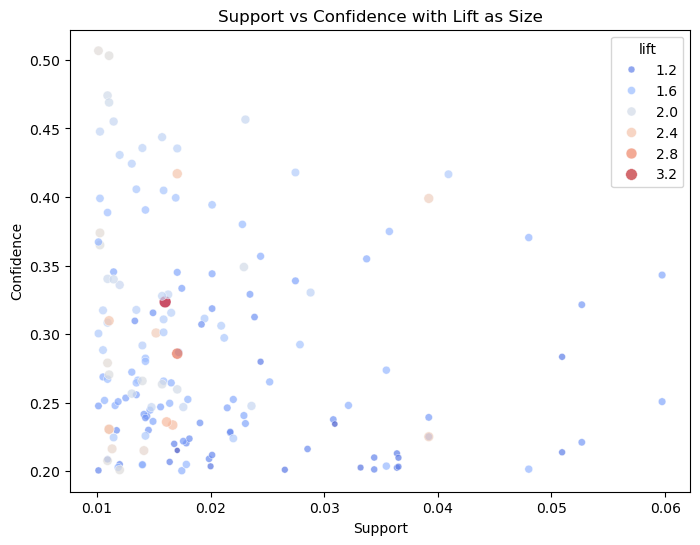

In [26]:
# Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=rules["support"], y=rules["confidence"], size=rules["lift"], hue=rules["lift"], palette="coolwarm", alpha=0.7)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence with Lift as Size")
plt.show()

In [24]:
rules_sorted.to_csv("association_rules.csv", index=False)

In [25]:
# saved rules CSV

df_rules = pd.read_csv("association_rules.csv")
print(df_rules.head(10))  

                                         antecedents  \
0                       frozenset({'herb & pepper'})   
1          frozenset({'mineral water', 'spaghetti'})   
2                            frozenset({'tomatoes'})   
3                              frozenset({'shrimp'})   
4               frozenset({'mineral water', 'milk'})   
5        frozenset({'mineral water', 'ground beef'})   
6  frozenset({'mineral water', 'frozen vegetables'})   
7               frozenset({'mineral water', 'milk'})   
8                                frozenset({'soup'})   
9                         frozenset({'ground beef'})   

                        consequents  antecedent support  consequent support  \
0        frozenset({'ground beef'})            0.049467            0.098267   
1        frozenset({'ground beef'})            0.059733            0.098267   
2  frozenset({'frozen vegetables'})            0.068400            0.095333   
3  frozenset({'frozen vegetables'})            0.071333            

# Interview Questions 

## 1.What is lift and why is it important in Association rules?
- **Lift** measures the strength of association between products.  
- **Formula:**  
  Lift(A → B) = Confidence(A → B) / Support(B)  
- **Interpretation:**  
  - **Lift > 1** → Strong association (A increases B's purchase likelihood).  
  - **Lift = 1** → No relationship.  
  - **Lift < 1** → Negative association.  

---

## 2.What is support and Confidence. How do you calculate them?

- **Support:** Frequency of an item in transactions.  
  Support(A) = Transactions with A / Total Transactions  
- **Confidence:** Probability of buying B when A is bought.  
  Confidence(A → B) = Support(A ∪ B) / Support(A)  

---

## 3.What are some limitations or challenges of Association rules mining?
- **Computational Complexity** – Large datasets generate too many rules.  
- **Threshold Selection** – Setting support & confidence too high/low affects results.  
- **Redundant/Useless Rules** – Many rules may not be meaningful.  
- **Rare Items Ignored** – Important but low-frequency products may be missed.  
- **No Time Consideration** – Does not account for seasonal trends.  

---
